# AI in Digital Medicine - Computing & Software Engineering Part  - 
## Multi-Criteria Optimization Algorithms applied on Parkinson's Disease Progression

### SMART & BORDA code written by me - © or1610 
#### TOPSIS: Credit https://github.com/Tewatia5355/Topsis_tewatia/blob/master/Topsis_Tewatia/topsis.py

In [1]:
# pip install pandas

## Original Dataset Details of the Project

######  This is the dataset fron KAGGLE website
######  I will analyze this dataset via MACHINE LEARNING Algorithms in order to find the most efficient colums in relation to the target column of the project 
##### After that, I will collect sample of the data set: (15 randomly chosen rows of the dataset ) X  (the chosen colums by the ML algorithm result) 
###### Then, I will apply over this "mini-datadet" the  Multi-Criteria Optimization Algorithm

In [2]:
import pandas as pd
df=pd.read_csv('parkinsons_updrs.data.csv') # this is the dataset fron KAGGLE website 

In [3]:
df.columns 

Index(['index', 'subject#', 'age', 'sex', 'test_time', 'motor_UPDRS',
       'total_UPDRS', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5',
       'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

In [4]:
df.describe()

,index,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,2937.000000,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,1696.110747,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,0.000000,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,1468.500000,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,2937.000000,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,4405.500000,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,5874.000000,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


In [5]:
df.shape

(5875, 23)

#### Column name	               Description

subject# 	               Unique identifier for each subject which ranges from 1 - 31 (Numeric Data Type)

age	                       Age of Subject (Numeric Data Type)

sex	                       Gender of Subject (Categorical Data Type)

test_time	               Time since recruitment into trial (Numeric Data Type)

motor_UPDRS	               Motor UPDRS score (Numeric Data Type)

total_UPDRS	               Total UPDRS score (Numeric Data Type)

Jitter(%)	               Percentage of local variation in fundamental frequency (Numeric Data Type)

Jitter(Abs)	               Absolute jitter (Numeric Data Type)

Jitter	                   Difference between consecutive differences of fundamental frequency (Numeric Data Type)

Shimmer	                   Difference between consecutive differences of amplitude (Numeric Data Type)

Shimmer(dB)	               Shimmer in decibels (Numeric Data Type)

NHR	                       Noise-to-harmonics ratio (Numeric Data Type)

HNR	                       Harmonics-to-noise ratio (Numeric Data Type)

RPDE	                   Recurrence period density entropy (Numeric Data Type)

DFA	                       Detrended fluctuation analysis (Numeric Data Type)

PPE                        Pitch period entropy (Numeric Data Type)

In [6]:
# Select the column you want to normalize
from sklearn.preprocessing import MinMaxScaler

# Select the columns you want to normalize
cols = df[['test_time', 'motor_UPDRS',
       'total_UPDRS', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5',
       'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']]

# # Create an instance of the MinMaxScaler
# scaler = MinMaxScaler()

# # Fit the scaler to the data
# scaler.fit(cols)

# # Transform the data and store it in a new DataFrame
# normalized_df = pd.DataFrame(scaler.transform(cols), columns=cols.columns) 


# Create an instance of the MinMaxScaler
scaler = MinMaxScaler()

# Normalize each column separately
for col in cols:
    df[col] = scaler.fit_transform(df[[col]]) 

C:\Apps\ANACONDA\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
# Update df  with the columns from normalized_df

df.describe() 


,index,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,2937.000000,21.494128,64.804936,0.317787,0.441980,0.471627,0.458804,0.053689,0.094233,0.046446,...,0.136934,0.096521,0.110275,0.091552,0.096500,0.042560,0.552808,0.479048,0.395949,0.278418
std,1696.110747,12.372279,8.821524,0.465656,0.243208,0.235814,0.222960,0.056719,0.081164,0.054603,...,0.110646,0.082187,0.100945,0.073217,0.082188,0.079805,0.118486,0.123900,0.201678,0.128917
min,0.000000,1.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1468.500000,10.000000,58.000000,0.000000,0.232580,0.288986,0.299446,0.027733,0.045529,0.021849,...,0.071600,0.047622,0.053610,0.048265,0.047581,0.014264,0.490032,0.391094,0.233644,0.189303
50%,2937.000000,22.000000,65.000000,0.000000,0.435879,0.459292,0.428738,0.041045,0.072811,0.033561,...,0.109082,0.075065,0.084807,0.074074,0.075065,0.024282,0.559449,0.480001,0.368529,0.258567
75%,4405.500000,33.000000,72.000000,1.000000,0.649401,0.654385,0.612581,0.060206,0.115228,0.051739,...,0.162902,0.117751,0.132148,0.110726,0.117751,0.041682,0.629142,0.568087,0.561199,0.341681
max,5874.000000,42.000000,85.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#duplicate the dataset to new dataset to explore 
df_exp=df.copy()

### The Dimmensions of dataframe

In [9]:
df_exp.shape

(5875, 23)

In [10]:
df_exp = df_exp.reset_index()  

In [11]:
df_exp = df_exp.drop(['level_0'], axis=1) 

df_exp is ready 

### Correlation analysis:  

In [12]:
# Calculate the correlation between the columns
corr = df_exp.corr()

# Get the absolute value of the correlation
corr_abs = abs(corr)

# Print the correlation matrix
print(corr_abs) 

                  index  subject#       age       sex  test_time  motor_UPDRS  \
index          1.000000  0.999544  0.030398  0.285831   0.003034     0.249790   
subject#       0.999544  1.000000  0.030864  0.286851   0.000882     0.252919   
age            0.030398  0.030864  1.000000  0.041602   0.019884     0.273665   
sex            0.285831  0.286851  0.041602  1.000000   0.009805     0.031205   
test_time      0.003034  0.000882  0.019884  0.009805   1.000000     0.067918   
motor_UPDRS    0.249790  0.252919  0.273665  0.031205   0.067918     1.000000   
total_UPDRS    0.251196  0.253643  0.310290  0.096559   0.075263     0.947231   
Jitter(%)      0.132775  0.135448  0.023071  0.051422   0.022837     0.084816   
Jitter(Abs)    0.072360  0.075156  0.035691  0.154645   0.011365     0.050903   
Jitter:RAP     0.117728  0.120339  0.010255  0.076718   0.028888     0.072684   
Jitter:PPQ5    0.133839  0.136474  0.013199  0.087995   0.023290     0.076291   
Jitter:DDP     0.117739  0.1

## The Correlation Matrix

The correlation matrix is a matrix that shows the correlation between multiple variables or features. It is a way to visualize and analyze the relationships between different variables and to identify any patterns or trends in the data.

It is important to note that the correlation matrix is a useful tool for exploring and understanding the relationships between variables, but it should not be used as the sole basis for making decisions or building a machine learning model. 

It is always important to consider the context and the goals of the analysis, and to use a combination of methods and techniques to analyze the data and make informed decisions.

<AxesSubplot:>

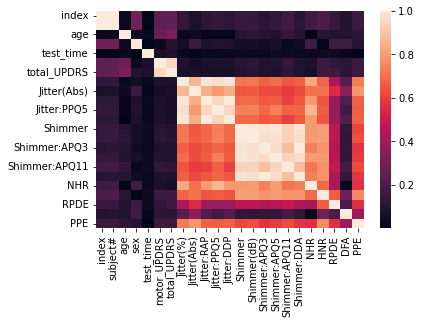

In [13]:
import seaborn as sns

# Calculate the correlation between the columns
corr = df_exp.corr()

# Get the absolute value of the correlation
corr_abs = abs(corr)

# Create a heatmap of the correlations
sns.heatmap(corr_abs)

### Conclusions of The Correlation Matrix 

To interpret a heatmap created using the seaborn library, 
you can look at the color intensity of the cells in the map.
The color intensity reflects the strength of the relationship between the two variables being plotted. 
Typically, darker colors indicate a stronger relationship, while lighter colors indicate a weaker relationship.

For example, if you are using a heatmap to visualize the correlations between different columns in a dataset, 
you can look at the intensity of the colors to see which columns are most strongly correlated. 
If a column is strongly correlated with many other columns, it will have a lot of dark colors in the heatmap. 
On the other hand, if a column is only weakly correlated with other columns, it will have a lot of light colors in the heatmap.

In addition to the color intensity, 
you can also look at the values in the cells of the heatmap to get a more precise measure of the strength of the relationship between the variables. For example, 
if you are using a heatmap to visualize correlations, the values in the cells will be the correlation coefficients, 
which range from -1 (perfect negative correlation) to 1 (perfect positive correlation).

To get more detailed insights from a heatmap, you can also use it in combination with other data visualization techniques, 
such as scatter plots or line plots, to get a more comprehensive view of the relationships between the variables.

##### It seems we can use attributes selection in our data set for ranking - 
#####  the initial columns that has strong correlation to "toal_UPRDS" -
'age', 'motor_UPDRS',  'total_UPDRS', 'Jitter(%)', 
'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5',
'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 
'Shimmer:APQ5','Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'

### Feature Selection   

Feature selection is the process of selecting a subset of relevant features (also known as predictors, inputs, or attributes) for use in model construction. 

The goal of feature selection is to select the most relevant features that can help to improve the accuracy and interpretability of the model, while reducing the complexity and overfitting of the model. 


There are several benefits to performing feature selection:

It can help to improve the performance of the model by reducing the noise and irrelevant information in the data.
It can help to reduce the training time and computational resources required to build the model.
It can help to improve the interpretability and explainability of the model by identifying the most important features that contribute to the prediction.

It can help to avoid the risk of overfitting the model by limiting the number of features and reducing the complexity of the model.

There are many different techniques that can be used for feature selection, including filter methods, wrapper methods, and embedded methods. The appropriate method will depend on the specific characteristics of the data and the goals of the model.

For example, filter methods select features based on statistical measures of the data, such as correlation or mutual information. Wrapper methods use a machine learning model to evaluate the performance of different feature subsets, and select the subset that performs the best. Embedded methods incorporate feature selection as a part of the model training process, such as regularization methods that penalize the use of irrelevant features.

It is important to note that feature selection is a crucial step in the model development process, and it should be carefully considered and thoroughly tested to ensure that the selected features are relevant and meaningful for the problem at hand.

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Select the features and target
# X = df_exp.drop('motor_UPDRS', axis=1)
# y = df_exp['motor_UPDRS']
# total_UPDRS

X = df_exp.drop('total_UPDRS', axis=1)
y = df_exp['total_UPDRS'] 

# Create an instance of the SelectKBest class
selector = SelectKBest(score_func=f_regression)

# Fit the selector to the data
selector.fit(X, y)

# Get the indices of the selected columns
selected_columns = X.columns[selector.get_support()]

# Print the selected columns
print(selected_columns)

Index(['index', 'subject#', 'age', 'motor_UPDRS', 'Shimmer(dB)',
       'Shimmer:APQ11', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')


### Conclusions of Feature selection  

### In order to choose the most efficient columns for applying the Ranking Algorithms 

The most efficient columns are: 

1) 'index' 

2) 'subject#'

3) 'age'

4) 'motor_UPDRS'

5) 'Shimmer(dB)'

6) 'Shimmer:APQ11'

7) 'HNR'

8) 'RPDE'

9) 'DFA'

10) 'PPE'

### PCA Dimensionality reduction: 

Principal component analysis (PCA) is a statistical technique that is used for dimensionality reduction and feature extraction. It is a linear transformation method that projects the data onto a lower-dimensional space, in a way that maximizes the variance of the data and preserves as much information as possible.

PCA is typically used to reduce the complexity and dimensionality of the data, while retaining the most important features or patterns in the data. It is often used to visualize high-dimensional data in a lower-dimensional space, or to extract a small number of principal components that capture most of the variance in the data.

To perform PCA, you first need to standardize the data, so that all the variables have zero mean and unit variance. Then, you can calculate the covariance matrix of the data, which is a matrix that shows the relationships between the variables. The covariance matrix is a square matrix with the same number of rows and columns as the number of variables. The diagonal elements of the matrix show the variance of each variable, and the off-diagonal elements show the covariance between pairs of variables.

####  It is important to note that PCA is a powerful tool for dimensionality reduction, but it is not suitable for all types of data.

####  PCA is a linear transformation method, which means that it can only capture linear relationships between the variables. If the data has non-linear relationships or patterns, PCA may not be able to capture them effectively. 

####  In addition, PCA is sensitive to outliers and noise in the data, and it can be affected by the scale and distribution of the variables. Therefore, it is important to carefully consider the limitations and assumptions of PCA and to choose the appropriate methods and techniques for the specific data and analysis goals.

In [15]:
from sklearn.decomposition import PCA

# # Load the DataFrame

# df=pd.read_csv('parkinsons_updrs.data.csv') 

# Select the features
X = df.drop('total_UPDRS', axis=1)

# Create an instance of the PCA class
pca = PCA()

# Fit the PCA model to the data
pca.fit(X)

# Get the explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_

# Print the explained variance ratios
print(explained_variance_ratios)

# Get the cumulative explained variance
cumulative_explained_variance = []
for i in range(len(explained_variance_ratios)):
    cumulative_explained_variance.append(sum(explained_variance_ratios[:i+1]))

# Print the cumulative explained variance
print(cumulative_explained_variance)

# Get the number of components that explain at least 95% of the variance
n_components = len([x for x in cumulative_explained_variance if x < 0.8])

# Print the recommended number of components
print("Recommended number of components:", n_components)

[9.99972765e-01 2.70257124e-05 7.07575814e-08 5.24430586e-08
 2.80963121e-08 2.05890093e-08 1.72437014e-08 1.04215489e-08
 3.97712665e-09 2.81879831e-09 1.40574578e-09 7.65516578e-10
 4.35317133e-10 2.89073403e-10 2.21034958e-10 8.67817181e-11
 5.67283348e-11 2.79921517e-11 1.48693213e-11 9.55507614e-12
 3.90997060e-16 4.89276857e-17]
[0.9999727646278243, 0.9999997903402486, 0.99999986109783, 0.9999999135408886, 0.9999999416372007, 0.99999996222621, 0.9999999794699115, 0.9999999898914603, 0.999999993868587, 0.9999999966873853, 0.999999998093131, 0.9999999988586475, 0.9999999992939647, 0.9999999995830381, 0.9999999998040731, 0.9999999998908548, 0.999999999947583, 0.9999999999755752, 0.9999999999904445, 0.9999999999999996, 1.0, 1.0]
Recommended number of components: 0


If you get a recommendation of 0 components after performing principal component analysis (PCA), it means that none of the components explain a significant amount of variance in the data. This could be due to a few different factors:

The data may not contain much variance to begin with. If the data consists of mostly constant or nearly constant values, then the variance explained by each component will be low.
The data may be too noisy or have too many outliers. In this case, the variance explained by each component may be lower because the noise and outliers are contributing to the variance.
The data may have too many dimensions relative to the number of samples. If the number of dimensions (features) is much larger than the number of samples, then the variance explained by each component may be low.
To address these issues, you may need to preprocess the data to remove noise, outliers, or irrelevant features. You can also try reducing the number of dimensions by using feature selection or dimensionality reduction techniques.

If you are unable to get a recommendation for the number of components to retain after preprocessing the data, it may not be suitable for PCA or other dimensionality reduction techniques. In this case, you may need to consider alternative approaches or techniques for your analysis or modeling.

### NOTE :  I got the same results for df_exp - the normalized dataset

### Therefore - I will not use PCA in order to reduce dimmensions of dataset, 

### I will apply the recommandation of "Conclusions of Feature selection" part 

In [16]:
df_exp = df_exp.reset_index() 

In [17]:
### Conclusions of Feature selection 

In [18]:
df_exp.columns

Index(['level_0', 'index', 'subject#', 'age', 'sex', 'test_time',
       'motor_UPDRS', 'total_UPDRS', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP',
       'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3',
       'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE',
       'DFA', 'PPE'],
      dtype='object')

In [19]:
# df_exp  = df_exp.drop(['level_0'], axis=1)

In [20]:
df_exp.columns

Index(['level_0', 'index', 'subject#', 'age', 'sex', 'test_time',
       'motor_UPDRS', 'total_UPDRS', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP',
       'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3',
       'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE',
       'DFA', 'PPE'],
      dtype='object')

In [21]:
df_exp = df_exp.drop(['level_0'], axis=1) 

In [22]:
df_exp.columns

Index(['index', 'subject#', 'age', 'sex', 'test_time', 'motor_UPDRS',
       'total_UPDRS', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5',
       'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

### AI Ranking Algorithms Implementation - BORDA, SMART, TOPSIS


In this part I will apply the next AI Ranking Algorithms Implementation
- BORDA, SMART, TOPSIS : the multi-objective optimization criteria 

After this, I will analize the results. 
There will be 4 ranking results of applying over a sample of 15 randomly selected rows of the normalized dataet. 

In [23]:
df_rank = df_exp.copy() 

### Attributes Weighting: 

It is difficult to determine how to weight each of the parameters you listed in terms of their efficiency in the assessment of Parkinson's disease, as the relative importance of each factor may vary depending on the specific context and the research study. Additionally, the relationship between these factors and Parkinson's disease is not fully understood and may vary among individuals.

In general, biomedical voice measurements, such as Jitter, Shimmer, HNR, RPDE, DFA, and PPE, may be used as part of the assessment of Parkinson's disease. These measures may be used to assess changes in a person's voice and speech that may be related to Parkinson's disease and to help identify potential biomarkers for the condition. However, it is important to consider these measures in the context of other clinical and functional measures, such as the severity of motor and non-motor symptoms, functional status, and cognitive and emotional changes, when assessing Parkinson's disease.

It is also worth noting that the measures you listed are not the only factors that may be relevant to the assessment of Parkinson's disease. Other factors, such as genetics, brain imaging, and medical history, may also be taken into consideration when making a diagnosis and developing a care plan for people with Parkinson's disease.

Choose only the recommended columns + target column -  'motor_UPDRS' 

In [24]:
df_rank = df_rank[['index', 'subject#', 'age', 'motor_UPDRS', 'Shimmer(dB)',
       'Shimmer:APQ11', 'HNR', 'RPDE', 'DFA', 'PPE', 'total_UPDRS' ]] 

In [25]:
## converting the data set to CSV file 

In [26]:
df_rank.to_csv('parkinson_converted.csv', index=True)

Choose only 15 rows 

In [27]:
# Take a sample of 5 random rows from the dataframe
sample = df_rank.sample(n=15)

# Reset the index of the sample dataframe and create a new column of indices
sample = sample.reset_index(drop=True)

# Print the sample dataframe
print(sample)

    index  subject#  age  motor_UPDRS  Shimmer(dB)  Shimmer:APQ11       HNR  \
0    2407        17   66     0.730081     0.066314       0.029564  0.646372   
1    4483        33   66     0.699884     0.207112       0.151409  0.427601   
2    5556        40   85     0.316021     0.076886       0.051178  0.599045   
3     145         1   72     0.883939     0.098991       0.040188  0.646648   
4    3048        23   59     0.265432     0.089861       0.064293  0.554865   
5     755         6   63     0.714214     0.193176       0.126974  0.525983   
6    3886        29   78     0.536743     0.137434       0.101806  0.632676   
7    5628        41   68     0.920518     0.199904       0.123713  0.374641   
8    3735        27   57     0.201962     0.171072       0.113822  0.425006   
9     366         3   57     0.533726     0.081211       0.043741  0.703833   
10   4428        33   66     0.594121     0.222009       0.127596  0.443975   
11   4107        30   49     0.699275     0.091783  

In [28]:
# sample = sample.drop(['index'], axis=1) 

In [29]:
sample

,index,subject#,age,motor_UPDRS,Shimmer(dB),Shimmer:APQ11,HNR,RPDE,DFA,PPE,total_UPDRS
0,2407,17,66,0.730081,0.066314,0.029564,0.646372,0.491976,0.196553,0.204703,0.596079
1,4483,33,66,0.699884,0.207112,0.151409,0.427601,0.613255,0.228610,0.354333,0.520920
2,5556,40,85,0.316021,0.076886,0.051178,0.599045,0.406191,0.268318,0.242998,0.351371
3,145,1,72,0.883939,0.098991,0.040188,0.646648,0.327350,0.064143,0.221032,0.812906
4,3048,23,59,0.265432,0.089861,0.064293,0.554865,0.428140,0.599926,0.255848,0.392461
5,755,6,63,0.714214,0.193176,0.126974,0.525983,0.640517,0.355814,0.316912,0.801988
6,3886,29,78,0.536743,0.137434,0.101806,0.632676,0.439170,0.203322,0.246154,0.477038
7,5628,41,68,0.920518,0.199904,0.123713,0.374641,0.621378,0.593156,0.678547,0.787027
8,3735,27,57,0.201962,0.171072,0.113822,0.425006,0.462874,0.521789,0.426091,0.237852
9,366,3,57,0.533726,0.081211,0.043741,0.703833,0.274348,0.102116,0.209098,0.390253


In [30]:
sample.shape

(15, 11)

In [31]:
sample.columns 

Index(['index', 'subject#', 'age', 'motor_UPDRS', 'Shimmer(dB)',
       'Shimmer:APQ11', 'HNR', 'RPDE', 'DFA', 'PPE', 'total_UPDRS'],
      dtype='object')

#### Negative & Positive Features  of the edited dataset

'index': This feature does not provide any information about a person's voice or speech and is not relevant to the assessment of Parkinson's disease.

'subject#': This feature does not provide any information about a person's voice or speech and is not relevant to the assessment of Parkinson's disease.

'age': Age is not typically considered a positive or negative factor in the assessment of Parkinson's disease. However, older age is a risk factor for the development of Parkinson's disease, and people with the condition are more likely to be diagnosed at an older age.

'motor_UPDRS': The Motor UPDRS (Unified Parkinson's Disease Rating Scale) is a measure of motor symptoms in Parkinson's disease, such as tremors, rigidity, and problems with movement and balance. Higher scores on the Motor UPDRS may indicate more severe motor symptoms and may be considered a negative factor in the assessment of Parkinson's disease.

'Shimmer(dB)': Shimmer is a measure of local variations in voice amplitude, or loudness. Higher levels of shimmer may be indicative of voice problems and may be considered a negative factor in the assessment of Parkinson's disease.

'Shimmer:APQ11': Shimmer:APQ11 is a measure of local variations in voice amplitude, or loudness. Higher levels of shimmer may be indicative of voice problems and may be considered a negative factor in the assessment of Parkinson's disease.

'HNR': The HNR (harmonics-to-noise ratio) is a measure of the relative levels of harmonic and noise components in the voice. Higher levels of HNR may be indicative of a higher quality voice and may be considered a positive factor in the assessment of Parkinson's disease.

'RPDE': The RPDE (recurrence period density entropy) is a measure of the complexity of the voice signal. Higher levels of RPDE may be indicative of a more complex voice signal and may be considered a positive factor in the assessment of Parkinson's disease.

'DFA': The DFA (detrended fluctuation analysis) is a measure of the long-range correlations in the voice signal. Higher levels of DFA may be indicative of a more stable voice signal and may be considered a positive factor in the assessment

'PPE': The PPE (pitch period entropy) is a measure of the complexity of the pitch of the voice. Higher levels of PPE may be indicative of a more complex pitch and may be considered a positive factor in the assessment of Parkinson's disease. However, it is important to note that the interpretation of PPE as a positive or negative factor may depend on the context and the specific research study. Some studies have found that higher levels of PPE are associated with more severe Parkinson's disease, while other studies have found no association or a negative association. More research is needed to fully understand the relationship between PPE and Parkinson's disease.


For example, in a study published in the Journal of Voice, higher levels of PPE were found to be associated with more severe Parkinson's disease and with greater impairment in voice and speech. However, in another study published in the journal Frontiers in Neurology, higher levels of PPE were not found to be significantly associated with Parkinson's disease or with voice and speech impairment.

Overall, the relationship between PPE and Parkinson's disease is not fully understood and more research is needed to clarify the role of PPE in the assessment of Parkinson's disease. It is important to consider PPE in the context of other biomedical voice measurements and clinical and functional measures when assessing Parkinson's disease.


The Total UPDRS (Unified Parkinson's Disease Rating Scale) is a measure of the overall severity of Parkinson's disease. It combines scores for motor symptoms (such as tremors, rigidity, and problems with movement and balance) with scores for non-motor symptoms (such as cognition, mood, and behavior).

'total_UPDRS' - Higher scores on the Total UPDRS may indicate more severe Parkinson's disease and may be considered a negative factor in the assessment of the condition. However, it is important to note that the interpretation of Total UPDRS scores as a positive or negative factor may depend on the context and the specific research study. Some studies have found that higher scores on the Total UPDRS are associated with greater impairment in quality of life and functional status in people with Parkinson's disease, while other studies have found no association or a negative association. More research is needed to fully understand the relationship between Total UPDRS scores and Parkinson's disease.

1) 'index'        0  weight 

2) 'subject#'     0  weight 

3) 'age'          -   weight 

4) 'motor_UPDRS'  -   weight 

5) 'Shimmer(dB)'  -   weight 

6) 'Shimmer:APQ11' -   weight 

7) 'HNR'           +   weight 

8) 'RPDE'          +   weight 

9) 'DFA'           +   weight 

10) 'PPE'          +  -  weight>>> not clear we will assume in 2 examples this feature as + and as - 

(once positive once negative)

11) 'total_UPDRS'  +  -  weight>>> not clear we will assume in 2 examples this feature as + and as -

(once positive once negative)

NOTE: about 10# and #11 columns - 
 

### IMPORTANT NOTE: about 10# and #11 columns -
##### in TOPSIS and BORDA 
#### in 1st example we will consider #10 as POSITIVE and #11 as NEGATIVE
####  in 2nd example we will consider #10 as NEGATIVE and #11 as POSITIVE 
### in SMART there is no Special reference to the positive or negative attribute


#### In Total, 4 Algorithms will be applied on EACH sample input matrix

## BORDA Algorithm  Implementation & Example

In [32]:
# import image module
from IPython.display import Image
  
# get the image
Image(url = "BORDA.jpg", width=800, height=500)

In [33]:
sample.columns 

Index(['index', 'subject#', 'age', 'motor_UPDRS', 'Shimmer(dB)',
       'Shimmer:APQ11', 'HNR', 'RPDE', 'DFA', 'PPE', 'total_UPDRS'],
      dtype='object')

unrelavant columns: 'index', 'subject#'

neagtive columns: 'age', 'motor_UPDRS', 'Shimmer(dB)', 'Shimmer:APQ11',

positive columns:  'HNR', 'RPDE', 'DFA'

can be also positive and negative: 'PPE' , 'total_UPDRS'  

In [34]:
df_borda = sample.loc[ :: , [ 'age', 'motor_UPDRS', 'Shimmer(dB)','Shimmer:APQ11', 'HNR', 'RPDE', 'DFA', 'PPE', 'total_UPDRS']]

In [35]:
df_borda_index = sample.loc[ :: , [ 'index']]

## BORDA  - First Example 

In [36]:
def BORDA_ex1(df, df_i): 
    # get the number of rows and columns
    m = df.shape
    rows = m[0]
    columns = m[1]
    # for each row
    df1 = df.copy()
    print ("the original dataframe \n")
    print(df, " \n" )
    #the positive parameters - higher is the best! 
    df_p = df1.loc[ :: , ['HNR', 'RPDE', 'DFA' , 'PPE' ] ].rank(axis=0, method='average', numeric_only=True, ascending=False)
    #the negative parameters  - upsite ranking, lowest is the best! 
    df_n = df1.loc[:: , [  'age', 'motor_UPDRS', 'Shimmer(dB)', 'Shimmer:APQ11',  'total_UPDRS'  ]].rank(axis=0, method='average', numeric_only=True, ascending=True) 
    df_f = pd.merge(df_p,df_n, left_index=True, right_index=True)
    print("the initially first ranked: the best gets the higher score \n")
    print(df_f, " \n" )
    rows, columns = df.shape
    # initialize the score list
    score = [0] * rows 
    # for each row
    for i in range(rows):
        # for each column
        for j in range(columns):# editing value via N - number of rows 
#             print(j)
            df_f.iloc[i, j] = abs(rows - df_f.iloc[i, j])
    print("the second ranked: with sub of number of rows \n")
    print(df_f, " \n" )
    #creating score column 
    for i in range(rows):
        # for each column
        for j in range(columns): # add the score
            score[i] =  score[i] + df_f.iloc[i, j]
    # return the score
    # adding score column to the data frame 
    df_f['Score'] = score 
    print("the third ranked: with column of score of each rows \n")
    print(df_f, " \n" )
    #adding the original names to the data frame 
    name_col = df_i
    print("the final table ranked with candidiates names \n")
    df_f = pd.merge(df_f,name_col, left_index=True, right_index=True)
    print(df_f, " \n" )
    return df_f  

In [37]:
borda1_res = BORDA_ex1(df_borda, df_borda_index)
print(borda1_res)

the original dataframe 

    age  motor_UPDRS  Shimmer(dB)  Shimmer:APQ11       HNR      RPDE  \
0    66     0.730081     0.066314       0.029564  0.646372  0.491976   
1    66     0.699884     0.207112       0.151409  0.427601  0.613255   
2    85     0.316021     0.076886       0.051178  0.599045  0.406191   
3    72     0.883939     0.098991       0.040188  0.646648  0.327350   
4    59     0.265432     0.089861       0.064293  0.554865  0.428140   
5    63     0.714214     0.193176       0.126974  0.525983  0.640517   
6    78     0.536743     0.137434       0.101806  0.632676  0.439170   
7    68     0.920518     0.199904       0.123713  0.374641  0.621378   
8    57     0.201962     0.171072       0.113822  0.425006  0.462874   
9    57     0.533726     0.081211       0.043741  0.703833  0.274348   
10   66     0.594121     0.222009       0.127596  0.443975  0.523593   
11   49     0.699275     0.091783       0.061948  0.680804  0.469180   
12   63     0.631454     0.200865      

## BORDA  - Second Example 

In [38]:
def BORDA_ex2(df, df_i): 
    # get the number of rows and columns
    m = df.shape
    rows = m[0]
    columns = m[1]
    # for each row
    df1 = df.copy()
    print ("the original dataframe \n")
    print(df, " \n" )
    #the positive parameters - higher is the best! 
    df_p = df1.loc[ :: , ['HNR', 'RPDE', 'DFA' , 'total_UPDRS'] ].rank(axis=0, method='average', numeric_only=True, ascending=False)
    #the negative parameters  - upsite ranking, lowest is the best! 
    df_n = df1.loc[:: , [  'age', 'motor_UPDRS', 'Shimmer(dB)', 'Shimmer:APQ11', 'PPE'  ]].rank(axis=0, method='average', numeric_only=True, ascending=True) 
    df_f = pd.merge(df_p,df_n, left_index=True, right_index=True)
    print("the initially first ranked: the best gets the higher score \n")
    print(df_f, " \n" )
    rows, columns = df.shape
    # initialize the score list
    score = [0] * rows 
    # for each row
    for i in range(rows):
        # for each column
        for j in range(columns):# editing value via N - number of rows 
#             print(j)
            df_f.iloc[i, j] = abs(rows - df_f.iloc[i, j])
    print("the second ranked: with sub of number of rows \n")
    print(df_f, " \n" )
    #creating score column 
    for i in range(rows):
        # for each column
        for j in range(columns): # add the score
            score[i] =  score[i] + df_f.iloc[i, j]
    # return the score
    # adding score column to the data frame 
    df_f['Score'] = score 
    print("the third ranked: with column of score of each rows \n")
    print(df_f, " \n" )
    #adding the original names to the data frame 
    name_col = df_i
    print("the final table ranked with candidiates names \n")
    df_f = pd.merge(df_f,name_col, left_index=True, right_index=True)
    print(df_f, " \n" )
    return df_f  

In [39]:
borda2_res = BORDA_ex2(df_borda, df_borda_index)
print(borda2_res)

the original dataframe 

    age  motor_UPDRS  Shimmer(dB)  Shimmer:APQ11       HNR      RPDE  \
0    66     0.730081     0.066314       0.029564  0.646372  0.491976   
1    66     0.699884     0.207112       0.151409  0.427601  0.613255   
2    85     0.316021     0.076886       0.051178  0.599045  0.406191   
3    72     0.883939     0.098991       0.040188  0.646648  0.327350   
4    59     0.265432     0.089861       0.064293  0.554865  0.428140   
5    63     0.714214     0.193176       0.126974  0.525983  0.640517   
6    78     0.536743     0.137434       0.101806  0.632676  0.439170   
7    68     0.920518     0.199904       0.123713  0.374641  0.621378   
8    57     0.201962     0.171072       0.113822  0.425006  0.462874   
9    57     0.533726     0.081211       0.043741  0.703833  0.274348   
10   66     0.594121     0.222009       0.127596  0.443975  0.523593   
11   49     0.699275     0.091783       0.061948  0.680804  0.469180   
12   63     0.631454     0.200865      

## SMART Algorithm Implementation 

In [40]:
# import image module
from IPython.display import Image
  
# get the image
Image(url = "smart_algo.jpg", width=900, height=500)

In [41]:
sample.columns  

Index(['index', 'subject#', 'age', 'motor_UPDRS', 'Shimmer(dB)',
       'Shimmer:APQ11', 'HNR', 'RPDE', 'DFA', 'PPE', 'total_UPDRS'],
      dtype='object')

In [42]:
sample.shape

(15, 11)

In [43]:
sample

,index,subject#,age,motor_UPDRS,Shimmer(dB),Shimmer:APQ11,HNR,RPDE,DFA,PPE,total_UPDRS
0,2407,17,66,0.730081,0.066314,0.029564,0.646372,0.491976,0.196553,0.204703,0.596079
1,4483,33,66,0.699884,0.207112,0.151409,0.427601,0.613255,0.228610,0.354333,0.520920
2,5556,40,85,0.316021,0.076886,0.051178,0.599045,0.406191,0.268318,0.242998,0.351371
3,145,1,72,0.883939,0.098991,0.040188,0.646648,0.327350,0.064143,0.221032,0.812906
4,3048,23,59,0.265432,0.089861,0.064293,0.554865,0.428140,0.599926,0.255848,0.392461
5,755,6,63,0.714214,0.193176,0.126974,0.525983,0.640517,0.355814,0.316912,0.801988
6,3886,29,78,0.536743,0.137434,0.101806,0.632676,0.439170,0.203322,0.246154,0.477038
7,5628,41,68,0.920518,0.199904,0.123713,0.374641,0.621378,0.593156,0.678547,0.787027
8,3735,27,57,0.201962,0.171072,0.113822,0.425006,0.462874,0.521789,0.426091,0.237852
9,366,3,57,0.533726,0.081211,0.043741,0.703833,0.274348,0.102116,0.209098,0.390253


In [44]:
w = [0.1 , 0.1 , 0.1 , 0.1, 0.1, 0.1, 0.1, 0.1, 0.2 ] # the same length as number of col
# sum of wi is 1 
T = [0,0,0,0,0,0,0,0,0, 0,0,0,0,0,0] # the same length as number of rows
# print(len(T))
name_col = sample.loc[ :: , ['subject#', 'index']]
df_smart = sample.loc[ :: , ['age', 'motor_UPDRS', 'Shimmer(dB)', 'Shimmer:APQ11', 'HNR','RPDE', 'DFA', 'PPE', 'total_UPDRS']]
rows, columns = df_smart.shape
print(df_smart.shape)
for i in range(rows):
#     print(i)
    for j in range(columns): 
#         print(j)
        T[i] = T[i] + w[j]*df_smart.iloc[i, j]
print(T ,"\n")
df_smart = pd.merge(df_smart ,name_col, left_index=True, right_index=True)
df_smart['SmartScore'] = T 

(15, 9)
[6.955771879748252, 6.972404398642253, 8.766337919180154, 7.590810322197581, 6.204328648097356, 6.7477565147473175, 8.12513811267311, 7.308591158204578, 5.979831930397128, 5.972857840803931, 6.953922720074134, 5.34318422070154, 6.710595775583067, 7.10432164284427, 6.683373353601435] 



In [45]:
print(df_smart)

    age  motor_UPDRS  Shimmer(dB)  Shimmer:APQ11       HNR      RPDE  \
0    66     0.730081     0.066314       0.029564  0.646372  0.491976   
1    66     0.699884     0.207112       0.151409  0.427601  0.613255   
2    85     0.316021     0.076886       0.051178  0.599045  0.406191   
3    72     0.883939     0.098991       0.040188  0.646648  0.327350   
4    59     0.265432     0.089861       0.064293  0.554865  0.428140   
5    63     0.714214     0.193176       0.126974  0.525983  0.640517   
6    78     0.536743     0.137434       0.101806  0.632676  0.439170   
7    68     0.920518     0.199904       0.123713  0.374641  0.621378   
8    57     0.201962     0.171072       0.113822  0.425006  0.462874   
9    57     0.533726     0.081211       0.043741  0.703833  0.274348   
10   66     0.594121     0.222009       0.127596  0.443975  0.523593   
11   49     0.699275     0.091783       0.061948  0.680804  0.469180   
12   63     0.631454     0.200865       0.125545  0.516816  0.52

## TOPSIS Algorithm Implementation 

In [46]:
# import image module
from IPython.display import Image
  
# get the image
Image(url = "TOPSIS.jpg", width=950, height=500)

In [47]:
dataset = sample.loc[ :: , ['index','age', 'motor_UPDRS', 'Shimmer(dB)', 'Shimmer:APQ11', 'HNR', 'RPDE', 'DFA', 'PPE', 'total_UPDRS']]
# temp_dataset = dataset 
nRow, nCol = dataset.shape 
weights = [ 0.1, 0.1, 0.1, 0.1, 0.1, 0.1 , 0.1, 0.1, 0.2] 
impact1 = [ "-", "-", "-" ,"-", "+", "+", "+" ,"+","-"]
impact2 = [ "-", "-", "-" ,"-", "+", "+", "+" ,"-","+"]
print(dataset) 

    index  age  motor_UPDRS  Shimmer(dB)  Shimmer:APQ11       HNR      RPDE  \
0    2407   66     0.730081     0.066314       0.029564  0.646372  0.491976   
1    4483   66     0.699884     0.207112       0.151409  0.427601  0.613255   
2    5556   85     0.316021     0.076886       0.051178  0.599045  0.406191   
3     145   72     0.883939     0.098991       0.040188  0.646648  0.327350   
4    3048   59     0.265432     0.089861       0.064293  0.554865  0.428140   
5     755   63     0.714214     0.193176       0.126974  0.525983  0.640517   
6    3886   78     0.536743     0.137434       0.101806  0.632676  0.439170   
7    5628   68     0.920518     0.199904       0.123713  0.374641  0.621378   
8    3735   57     0.201962     0.171072       0.113822  0.425006  0.462874   
9     366   57     0.533726     0.081211       0.043741  0.703833  0.274348   
10   4428   66     0.594121     0.222009       0.127596  0.443975  0.523593   
11   4107   49     0.699275     0.091783       0.061

In [48]:
import os
import sys

# name = "Topsis_Tewatia/Topsis_Tewatia"
# __version__ = "1.0.4"
# __author__ = 'Yash Kumar Tewatia'
# __credits__ = 'Thapar Institute of Engineering and Technology'


def main():
    # Arguments not equal to 5
    # print("Checking for Errors...\n")
    if len(sys.argv) != 5:
        print("ERROR : NUMBER OF PARAMETERS")
        print("USAGE : python topsis.py inputfile.csv '1,1,1,1' '+,+,-,+' result.csv ")
        exit(1)

    # File Not Found error
    elif not os.path.isfile(sys.argv[1]):
        print(f"ERROR : {sys.argv[1]} Don't exist!!")
        exit(1)

    # File extension not csv
    elif ".csv" != (os.path.splitext(sys.argv[1]))[1]:
        print(f"ERROR : {sys.argv[1]} is not csv!!")
        exit(1)

    else:
        dataset, temp_dataset = pd.read_csv(
            sys.argv[1]), pd.read_csv(sys.argv[1])
        nCol = len(temp_dataset.columns.values)

        # less then 3 columns in input dataset
        if nCol < 3:
            print("ERROR : Input file have less then 3 columns")
            exit(1)

        # Handeling non-numeric value
        for i in range(1, nCol):
            pd.to_numeric(dataset.iloc[:, i], errors='coerce')
            dataset.iloc[:, i].fillna(
                (dataset.iloc[:, i].mean()), inplace=True)

        # Handling errors of weighted and impact arrays
        try:
            weights = [int(i) for i in sys.argv[2].split(',')]
        except:
            print("ERROR : In weights array please check again")
            exit(1)
        impact = sys.argv[3].split(',')
        for i in impact:
            if not (i == '+' or i == '-'):
                print("ERROR : In impact array please check again")
                exit(1)

        # Checking number of column,weights and impacts is same or not
        if nCol != len(weights)+1 or nCol != len(impact)+1:
            print(
                "ERROR : Number of weights, number of impacts and number of columns not same")
            exit(1)

        if (".csv" != (os.path.splitext(sys.argv[4]))[1]):
            print("ERROR : Output file extension is wrong")
            exit(1)
        if os.path.isfile(sys.argv[4]):
            os.remove(sys.argv[4])
        # print(" No error found\n\n Applying Topsis Algorithm...\n")
        topsis_pipy(temp_dataset, dataset, nCol, weights, impact)


def Normalize(temp_dataset, nCol, weights):
    # normalizing the array
    # print(" Normalizing the DataSet...\n")
    for i in range(1, nCol):
        temp = 0
        for j in range(len(temp_dataset)):
            temp = temp + temp_dataset.iloc[j, i]**2
        temp = temp**0.5
        for j in range(len(temp_dataset)):
            temp_dataset.iat[j, i] = (
                temp_dataset.iloc[j, i] / temp)*weights[i-1]
    return temp_dataset


def Calc_Values(temp_dataset, nCol, impact):
    # print(" Calculating Positive and Negative values...\n")
    p_sln = (temp_dataset.max().values)[1:]
    n_sln = (temp_dataset.min().values)[1:]
    for i in range(1, nCol):
        if impact[i-1] == '-':
            p_sln[i-1], n_sln[i-1] = n_sln[i-1], p_sln[i-1]
    return p_sln, n_sln


def topsis_pipy(temp_dataset, dataset, nCol, weights, impact):
    # normalizing the array
    temp_dataset = Normalize(temp_dataset, nCol, weights)

    # Calculating positive and negative values
    p_sln, n_sln = Calc_Values(temp_dataset, nCol, impact)

    # calculating topsis score
    # print(" Generating Score and Rank...\n")
    score = []
    for i in range(len(temp_dataset)):
        temp_p, temp_n = 0, 0
        for j in range(1, nCol):
            temp_p = temp_p + (p_sln[j-1] - temp_dataset.iloc[i, j])**2
            temp_n = temp_n + (n_sln[j-1] - temp_dataset.iloc[i, j])**2
        temp_p, temp_n = temp_p**0.5, temp_n**0.5
        score.append(temp_n/(temp_p + temp_n))
    dataset['Topsis Score'] = score

    # calculating the rank according to topsis score
    dataset['Rank'] = (dataset['Topsis Score'].rank(
        method='max', ascending=False))
    dataset = dataset.astype({"Rank": int})
    print(dataset)
    return(dataset)
    

    # Writing the csv
    # print(" Writing Result to CSV...\n")
#     dataset.to_csv(sys.argv[4], index=False)
    # print(" Successfully Terminated")


if __name__ == "__main__":
    main()

ERROR : NUMBER OF PARAMETERS
USAGE : python topsis.py inputfile.csv '1,1,1,1' '+,+,-,+' result.csv 


In [49]:
Topsis_Result1 = topsis_pipy(dataset, dataset, nCol, weights, impact1) 

    index       age  motor_UPDRS  Shimmer(dB)  Shimmer:APQ11       HNR  \
0    2407  0.025868     0.030572     0.011524       0.007891  0.029415   
1    4483  0.025868     0.029308     0.035990       0.040413  0.019460   
2    5556  0.033315     0.013234     0.013361       0.013660  0.027262   
3     145  0.028220     0.037015     0.017202       0.010727  0.029428   
4    3048  0.023125     0.011115     0.015615       0.017161  0.025251   
5     755  0.024692     0.029908     0.033569       0.033891  0.023937   
6    3886  0.030572     0.022476     0.023882       0.027174  0.028792   
7    5628  0.026652     0.038547     0.034738       0.033021  0.017049   
8    3735  0.022341     0.008457     0.029727       0.030381  0.019341   
9     366  0.022341     0.022350     0.014112       0.011675  0.032030   
10   4428  0.025868     0.024879     0.038579       0.034057  0.020205   
11   4107  0.019205     0.029282     0.015949       0.016535  0.030982   
12    816  0.024692     0.026442     0

In [50]:
Topsis_Result2 = topsis_pipy(dataset, dataset, nCol, weights, impact2) 

    index       age  motor_UPDRS  Shimmer(dB)  Shimmer:APQ11       HNR  \
0    2407  0.025868     0.030572     0.011524       0.007891  0.029415   
1    4483  0.025868     0.029308     0.035990       0.040413  0.019460   
2    5556  0.033315     0.013234     0.013361       0.013660  0.027262   
3     145  0.028220     0.037015     0.017202       0.010727  0.029428   
4    3048  0.023125     0.011115     0.015615       0.017161  0.025251   
5     755  0.024692     0.029908     0.033569       0.033891  0.023937   
6    3886  0.030572     0.022476     0.023882       0.027174  0.028792   
7    5628  0.026652     0.038547     0.034738       0.033021  0.017049   
8    3735  0.022341     0.008457     0.029727       0.030381  0.019341   
9     366  0.022341     0.022350     0.014112       0.011675  0.032030   
10   4428  0.025868     0.024879     0.038579       0.034057  0.020205   
11   4107  0.019205     0.029282     0.015949       0.016535  0.030982   
12    816  0.024692     0.026442     0

In [51]:
Topsis_Result1 

,index,age,motor_UPDRS,Shimmer(dB),Shimmer:APQ11,HNR,RPDE,DFA,PPE,total_UPDRS,Topsis Score,Rank
0,2407,0.025868,0.030572,0.011524,0.007891,0.029415,0.026557,0.012726,0.015647,0.052974,0.454845,7
1,4483,0.025868,0.029308,0.035990,0.040413,0.019460,0.033103,0.014802,0.027084,0.046295,0.363384,11
2,5556,0.033315,0.013234,0.013361,0.013660,0.027262,0.021926,0.017373,0.018574,0.031227,0.570770,4
3,145,0.028220,0.037015,0.017202,0.010727,0.029428,0.017670,0.004153,0.016895,0.072244,0.326356,14
4,3048,0.023125,0.011115,0.015615,0.017161,0.025251,0.023111,0.038843,0.019556,0.034878,0.634603,2
5,755,0.024692,0.029908,0.033569,0.033891,0.023937,0.034575,0.023038,0.024224,0.071273,0.309971,15
6,3886,0.030572,0.022476,0.023882,0.027174,0.028792,0.023706,0.013164,0.018815,0.042395,0.425767,9
7,5628,0.026652,0.038547,0.034738,0.033021,0.017049,0.033542,0.038405,0.051866,0.069944,0.440358,8
8,3735,0.022341,0.008457,0.029727,0.030381,0.019341,0.024986,0.033784,0.032569,0.021138,0.643764,1
9,366,0.022341,0.022350,0.014112,0.011675,0.032030,0.014809,0.006612,0.015983,0.034682,0.503464,6


In [52]:
Topsis_Result2

,index,age,motor_UPDRS,Shimmer(dB),Shimmer:APQ11,HNR,RPDE,DFA,PPE,total_UPDRS,Topsis Score,Rank
0,2407,0.025868,0.030572,0.011524,0.007891,0.029415,0.026557,0.012726,0.015647,0.052974,0.612223,3
1,4483,0.025868,0.029308,0.035990,0.040413,0.019460,0.033103,0.014802,0.027084,0.046295,0.408634,15
2,5556,0.033315,0.013234,0.013361,0.013660,0.027262,0.021926,0.017373,0.018574,0.031227,0.531235,9
3,145,0.028220,0.037015,0.017202,0.010727,0.029428,0.017670,0.004153,0.016895,0.072244,0.585679,5
4,3048,0.023125,0.011115,0.015615,0.017161,0.025251,0.023111,0.038843,0.019556,0.034878,0.617265,2
5,755,0.024692,0.029908,0.033569,0.033891,0.023937,0.034575,0.023038,0.024224,0.071273,0.583902,6
6,3886,0.030572,0.022476,0.023882,0.027174,0.028792,0.023706,0.013164,0.018815,0.042395,0.488817,12
7,5628,0.026652,0.038547,0.034738,0.033021,0.017049,0.033542,0.038405,0.051866,0.069944,0.510099,10
8,3735,0.022341,0.008457,0.029727,0.030381,0.019341,0.024986,0.033784,0.032569,0.021138,0.442064,13
9,366,0.022341,0.022350,0.014112,0.011675,0.032030,0.014809,0.006612,0.015983,0.034682,0.507879,11


### Results of each Multi-Criteria Optimization Algorithms applied on Parkinson`s Dataset Sample 

### BORDA Algorithm Results  (2 examples) 

In [53]:
borda1_res['Score']

0     62.0
1     47.0
2     66.0
3     37.0
4     82.0
5     52.0
6     55.0
7     51.5
8     83.5
9     71.5
10    52.0
11    87.0
12    58.0
13    85.5
14    55.0
Name: Score, dtype: float64

In [54]:
borda2_res['Score']

0     78.0
1     39.0
2     62.0
3     61.0
4     78.0
5     64.0
6     55.0
7     47.5
8     57.5
9     75.5
10    44.0
11    85.0
12    58.0
13    81.5
14    59.0
Name: Score, dtype: float64

### SMART Algorithm Results 

In [55]:
df_smart['SmartScore']

0     6.955772
1     6.972404
2     8.766338
3     7.590810
4     6.204329
5     6.747757
6     8.125138
7     7.308591
8     5.979832
9     5.972858
10    6.953923
11    5.343184
12    6.710596
13    7.104322
14    6.683373
Name: SmartScore, dtype: float64

### TOPSIS Algorithm Results 

In [56]:
Topsis_Result1[['Topsis Score' , 'Rank']]

,Topsis Score,Rank
0,0.454845,7
1,0.363384,11
2,0.570770,4
3,0.326356,14
4,0.634603,2
5,0.309971,15
6,0.425767,9
7,0.440358,8
8,0.643764,1
9,0.503464,6


In [57]:
Topsis_Result2[['Topsis Score' , 'Rank']]

,Topsis Score,Rank
0,0.612223,3
1,0.408634,15
2,0.531235,9
3,0.585679,5
4,0.617265,2
5,0.583902,6
6,0.488817,12
7,0.510099,10
8,0.442064,13
9,0.507879,11


## Final Ranking Results - For each Algorithm applied (also Sorted) 

In [58]:
borda1_res_sorted = borda1_res.sort_values(by=['Score'], ascending=False)
# we want the highest result of Borda score 
print(borda1_res_sorted['Score'])

11    87.0
13    85.5
8     83.5
4     82.0
9     71.5
2     66.0
0     62.0
12    58.0
6     55.0
14    55.0
5     52.0
10    52.0
7     51.5
1     47.0
3     37.0
Name: Score, dtype: float64


In [59]:
borda2_res_sorted = borda2_res.sort_values(by=['Score'], ascending=False)
# we want the highest result of Borda score 
print(borda2_res_sorted['Score'])

11    85.0
13    81.5
0     78.0
4     78.0
9     75.5
5     64.0
2     62.0
3     61.0
14    59.0
12    58.0
8     57.5
6     55.0
7     47.5
10    44.0
1     39.0
Name: Score, dtype: float64


In [60]:
# df_smart['SmartScore'].sort_values(by='SmartScore')

smart_res_sorted = df_smart.sort_values(by=['SmartScore'], ascending=False)
# we want the highest result of Borda score 
print(smart_res_sorted['SmartScore'])

2     8.766338
6     8.125138
3     7.590810
7     7.308591
13    7.104322
1     6.972404
0     6.955772
10    6.953923
5     6.747757
12    6.710596
14    6.683373
4     6.204329
8     5.979832
9     5.972858
11    5.343184
Name: SmartScore, dtype: float64


In [61]:
Topsis_res_sorted1 = Topsis_Result1.sort_values(by=['Topsis Score'], ascending=False)
# we want the closest result to 1 , so we will sort ONLY the topsis from the highest value to the lowest value 
print(Topsis_res_sorted1['Topsis Score'])

8     0.643764
4     0.634603
13    0.625074
2     0.570770
11    0.522438
9     0.503464
0     0.454845
7     0.440358
6     0.425767
10    0.411569
1     0.363384
12    0.355177
14    0.339152
3     0.326356
5     0.309971
Name: Topsis Score, dtype: float64


In [62]:
Topsis_res_sorted2 = Topsis_Result2.sort_values(by=['Topsis Score'], ascending=False)
# we want the closest result to 1 , so we will sort ONLY the topsis from the highest value to the lowest value 
print(Topsis_res_sorted2['Topsis Score'])

11    0.709705
4     0.617265
0     0.612223
13    0.605220
3     0.585679
5     0.583902
14    0.556292
12    0.552991
2     0.531235
7     0.510099
9     0.507879
6     0.488817
8     0.442064
10    0.433856
1     0.408634
Name: Topsis Score, dtype: float64


### Continue of analyzing  will come in the final document 